In [1]:
import os
import time
import numpy as np
import xarray as xr

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [53]:
# data_dir = os.path.join('..','data','down_test','TEST_DOWN_PARAMETERS_05_025_3h.nc')
data_dir = os.path.join('..','data','down_test','VENETO_DOWN_PARAMETERS_2001_2010_1dy_v2.nc')
DOWN = xr.open_dataset(data_dir)

lon = DOWN['lon']
lat = DOWN['lat']
lon2d, lat2d = np.meshgrid(lon, lat)

DOWN

<xarray.Dataset> Size: 17MB
Dimensions:   (year: 7, lat: 17, lon: 17, level: 10, time: 3652)
Coordinates:
  * time      (time) datetime64[ns] 29kB 2001-01-01 2001-01-02 ... 2010-12-31
  * level     (level) int64 80B 0 1 2 3 4 5 6 7 8 9
  * year      (year) int64 56B 1 2 5 10 20 50 100
  * lat       (lat) float64 136B 45.6 45.65 45.7 45.75 ... 46.25 46.3 46.35 46.4
  * lon       (lon) float64 136B 12.1 12.15 12.2 12.25 ... 12.75 12.8 12.85 12.9
Data variables: (12/24)
    MEV_d     (year, lat, lon) float64 16kB ...
    MEV_s     (year, lat, lon) float64 16kB ...
    NYs       (level, lat, lon) float64 23kB ...
    CYs       (level, lat, lon) float64 23kB ...
    WYs       (level, lat, lon) float64 23kB ...
    NYd       (level, lat, lon) float64 23kB ...
    ...        ...
    gam_d     (lat, lon) float64 2kB ...
    gam_s     (lat, lon) float64 2kB ...
    bet       (lat, lon) float64 2kB ...
    Fi        (time) float64 29kB ...
    QUANTILE  (time, lat, lon) float64 8MB ...
    RAIN_D    (time, lat, lon) float64 8MB ...
Attributes:
    description:  Dowscalling test

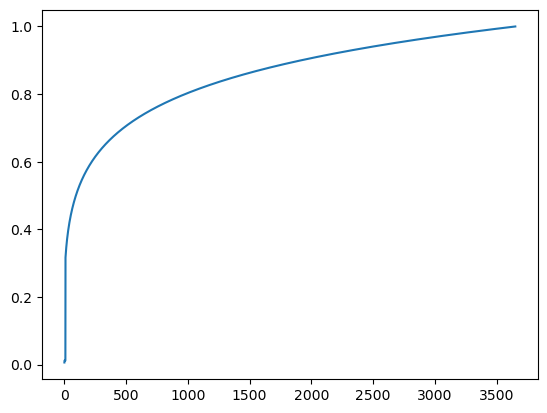

In [103]:
plt.plot(DOWN.QUANTILE[:,8,8])

In [107]:
DOWN['MEV_d'].shape, DOWN['MEV_s'].shape 

((7, 17, 17), (7, 17, 17))

In [54]:
Return_time = DOWN['year']
Return_time

<xarray.DataArray 'year' (year: 7)> Size: 56B
array([  1,   2,   5,  10,  20,  50, 100])
Coordinates:
  * year     (year) int64 56B 1 2 5 10 20 50 100

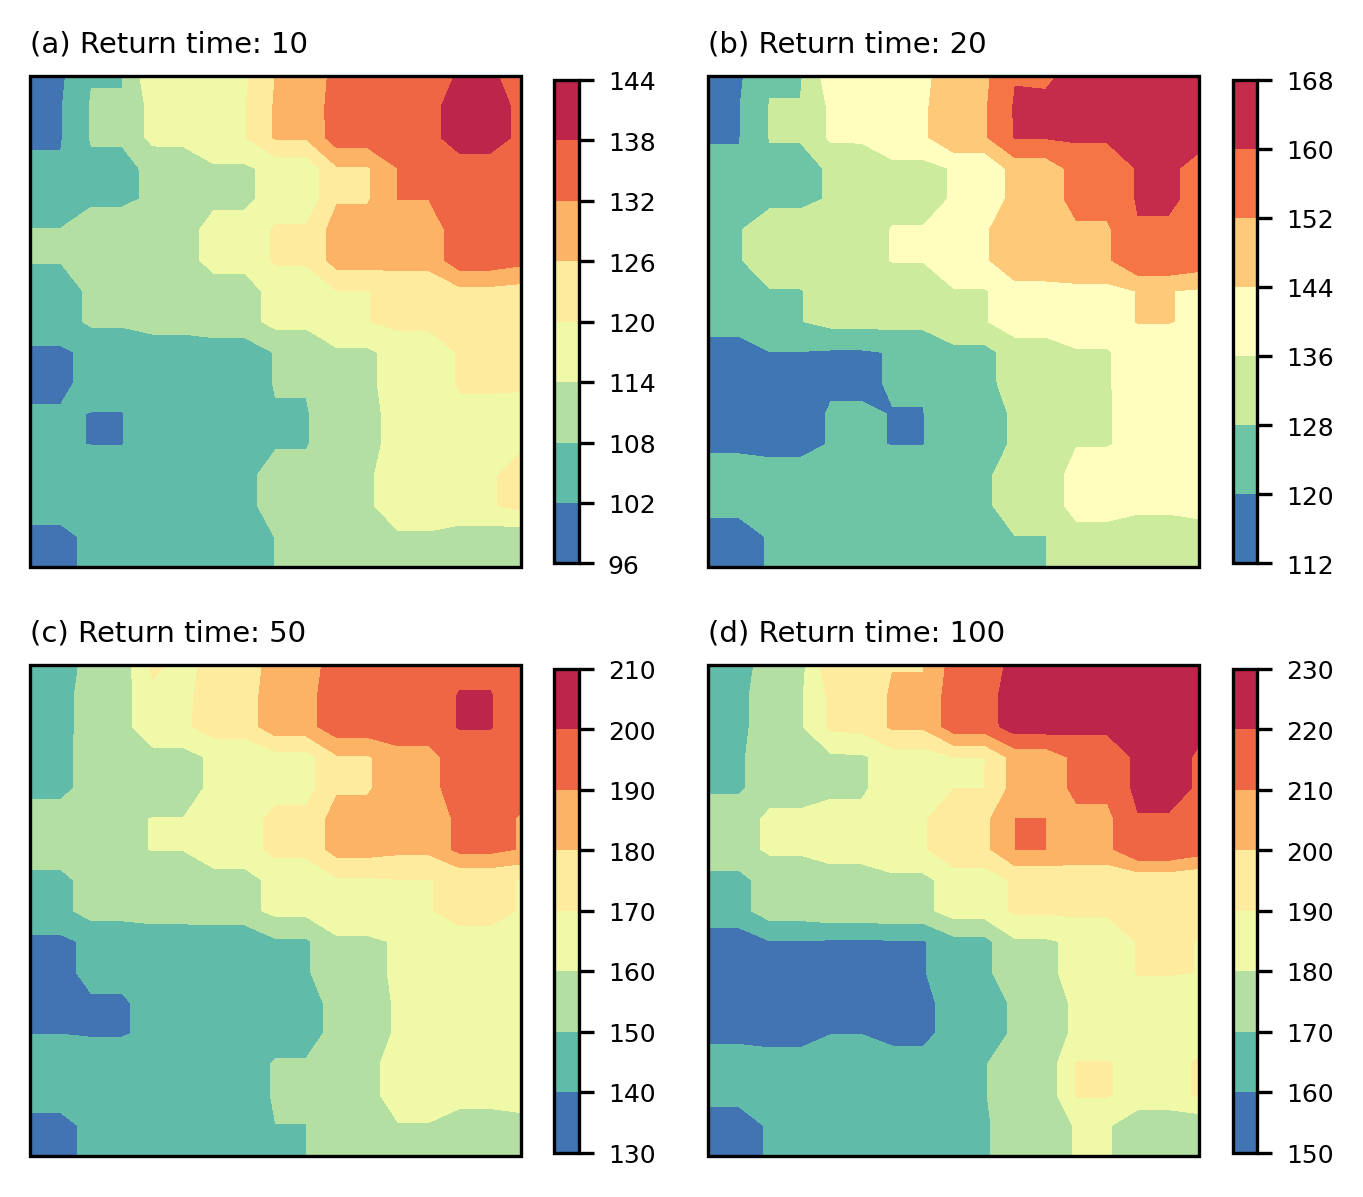

In [116]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,4),dpi=300)
gs = gridspec.GridSpec(2,2)

# =============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['MEV_d'][3,:,:], cmap=cmap)
cbar = plt.colorbar(a1, fraction=0.036)
cbar.ax.tick_params(labelsize=6)
ax1.set_title(f'(a) Return time: {Return_time.values[3]}', loc='left', fontsize=7)

# =============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['MEV_d'][4,:,:], cmap=cmap)
cbar = plt.colorbar(a1, fraction=0.036)
cbar.ax.tick_params(labelsize=6)
ax1.set_title(f'(b) Return time: {Return_time.values[4]}', loc='left', fontsize=7)

# =============================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['MEV_d'][5,:,:], cmap=cmap)
cbar = plt.colorbar(a1, fraction=0.036)
cbar.ax.tick_params(labelsize=6)
ax1.set_title(f'(c) Return time: {Return_time.values[5]}', loc='left', fontsize=7)

# =============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['MEV_d'][6,:,:], cmap=cmap)
cbar = plt.colorbar(a1, fraction=0.036)
cbar.ax.tick_params(labelsize=6)
ax1.set_title(f'(d) Return time: {Return_time.values[6]}', loc='left', fontsize=7)

# =============================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.01, hspace=0.2)

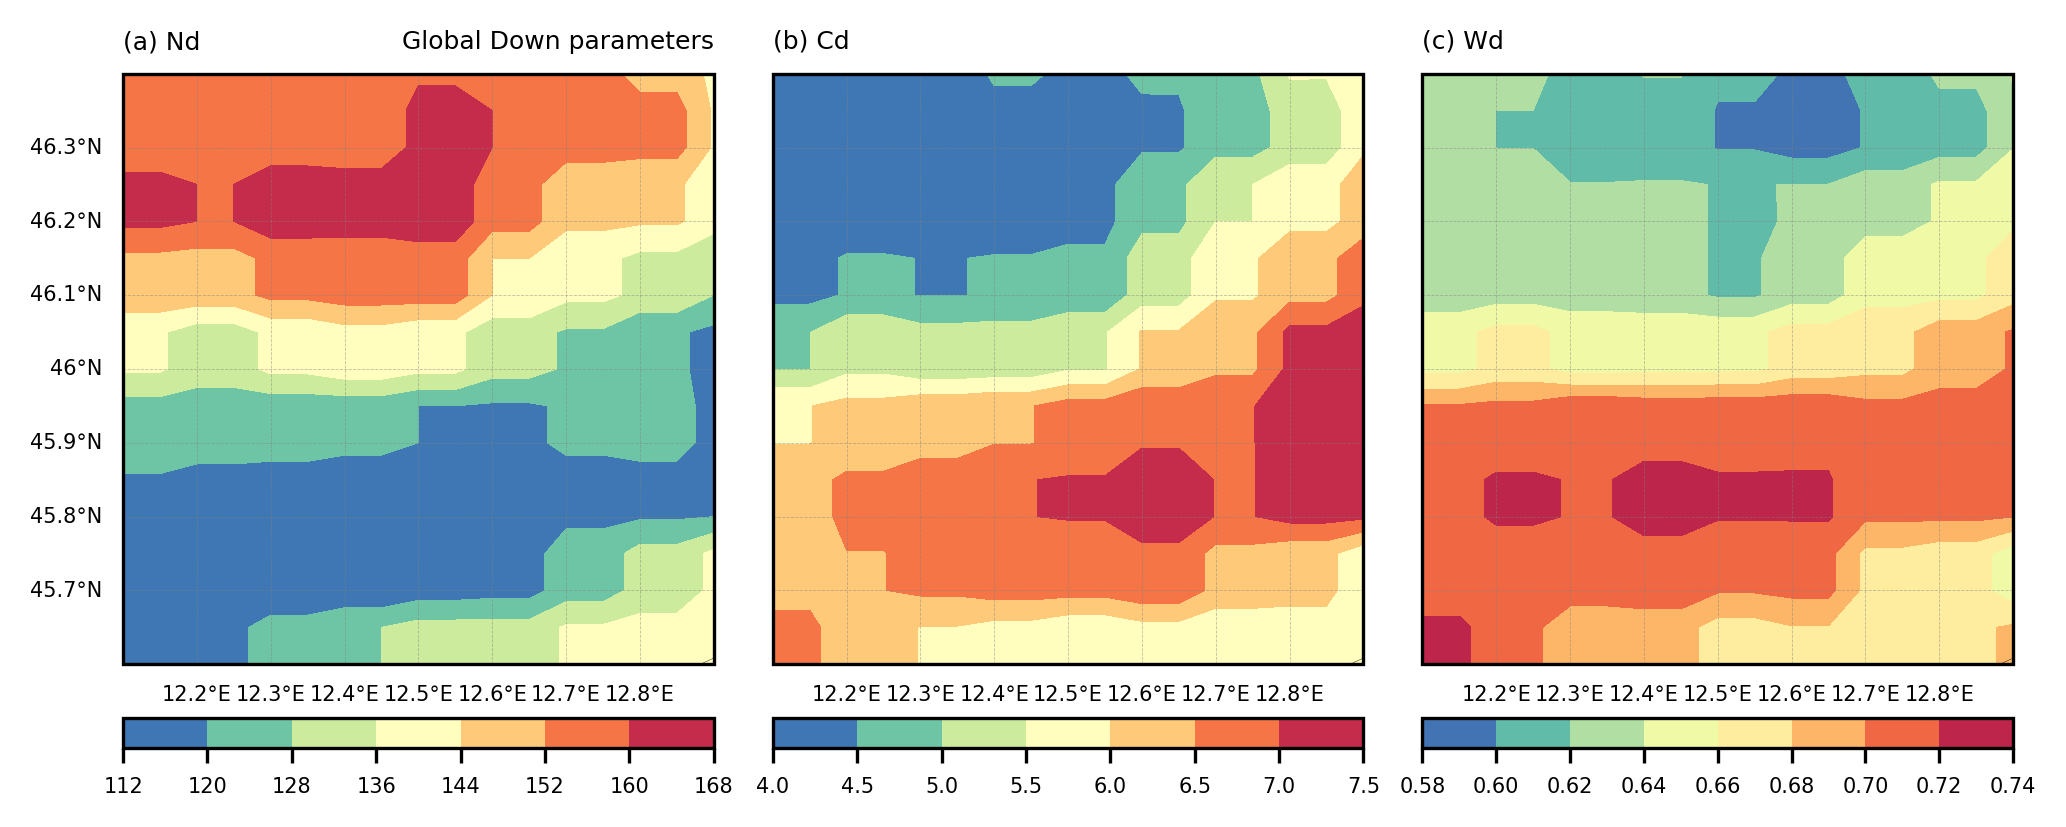

In [115]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,5),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([-94, -90, 31, 34], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
a1 = ax1.contourf(lon2d,  lat2d, DOWN.Nd, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.set_title(f'(a) Nd', loc='left', fontsize=6)
ax1.set_title(f'Global Down parameters', loc='right', fontsize=6)

cbar = plt.colorbar(a1, orientation='horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
# ax1.set_extent([-94, -90, 31, 34], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
a1 = ax1.contourf(lon2d,  lat2d, DOWN.Cd, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.set_title(f'(b) Cd', loc='left', fontsize=6)

cbar = plt.colorbar(a1, orientation='horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
# ax1.set_extent([-94, -90, 31, 34], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
a1 = ax1.contourf(lon2d,  lat2d, DOWN.Wd, cmap=cmap)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.set_title(f'(c) Wd', loc='left', fontsize=6)

cbar = plt.colorbar(a1, orientation='horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=5)

# =============================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.1, hspace=0.2)

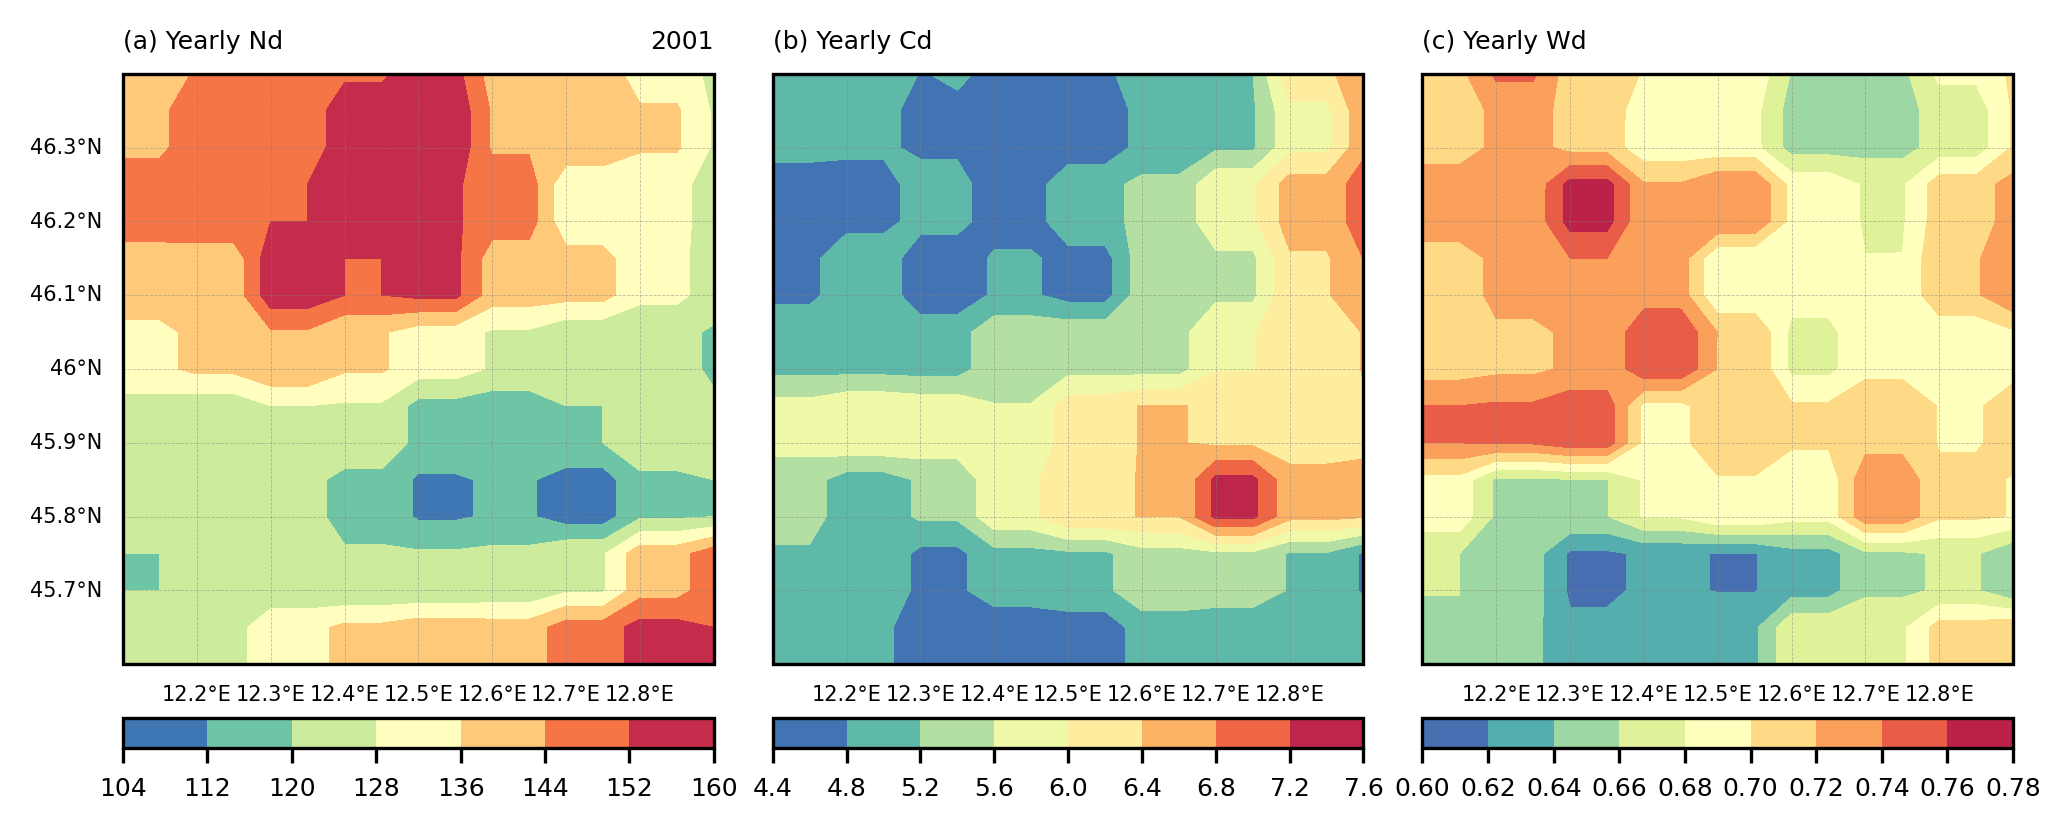

In [114]:
yy = 0

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,5),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['NYd'][yy,:,:], cmap=cmap)
ax1.set_title(f'(a) Yearly Nd', loc='left', fontsize=6)
ax1.set_title(f'{2001+DOWN.level.values[yy]}', loc='right', fontsize=6)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['CYd'][yy,:,:], cmap=cmap)
ax1.set_title(f'(b) Yearly Cd', loc='left', fontsize=6)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
a1 = ax1.contourf(lon2d, lat2d, DOWN['WYd'][yy,:,:], cmap=cmap)
ax1.set_title(f'(c) Yearly Wd', loc='left', fontsize=6)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='horizontal', pad=0.04)
cbar.ax.tick_params(labelsize=6)

# =============================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.1, hspace=0.2)